## **Naive Bayes**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

dataset = datasets.load_breast_cancer()
X = dataset['data']
Y = dataset['target']

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=500) 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print()

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nb_model.score(x_train,y_train)
nb_model.score(x_test,y_test)

#confusion_matrix for test data
print("Testing Confusion Matrix : ")
print(confusion_matrix(y_test,nb_model.predict(x_test)))
print()

print("Classification Report :")
print(classification_report(y_test,nb_model.predict(x_test)))

(455, 30)
(114, 30)
(455,)
(114,)

Testing Confusion Matrix : 
[[33  2]
 [ 1 78]]

Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        35
           1       0.97      0.99      0.98        79

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## **KNN**

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=500)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print()

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print(preds.shape)
print(preds == y_test)

(120, 4)
(30, 4)
(120,)
(30,)

(30,)
[ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


## **SVM**

(-2.0, 2.0, -2.0, 2.0)

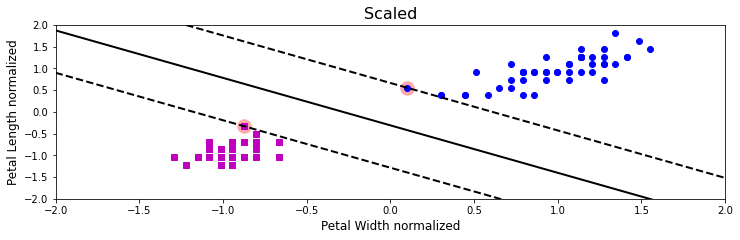

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

svm_clf.predict([[2.4, 3.1]])
import numpy as np

plt.figure(figsize=(12,3.2))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled, y)

plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1],"bo")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])